In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import datetime as dt
import missingno as miss

import seaborn as sns
import numpy as np
pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

In [2]:
sns.set_context('notebook', font_scale=0.9)
plt.style.use(['ggplot'])

In [3]:
default ="%Y-%m-%d %H:%M:%S.%f"
fmt = "%m/%d/%Y %I:%M:%S %p"

In [4]:
weather_df = pd.read_csv ('london_weather_MODIFIED - london_weather_MODIFIED.csv')

In [5]:
weather_df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
3,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
4,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00


In [6]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


# Converting Date Column into a datetime dtype

In [7]:
%%time
## Creating/testing our time format


fmt = '%Y%m%d'

## Test Format
weather_df['date'] = pd.to_datetime(weather_df['date'],
                                              format=fmt)

CPU times: total: 0 ns
Wall time: 11 ms


In [8]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


# Set Date as Index

In [9]:
df_ts = weather_df.set_index('date')
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15341 entries, 1979-01-01 to 2020-12-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       14938 non-null  float64
 1   sunshine          14957 non-null  float64
 2   global_radiation  14939 non-null  float64
 3   max_temp          14951 non-null  float64
 4   mean_temp         14922 non-null  float64
 5   min_temp          14955 non-null  float64
 6   precipitation     14951 non-null  float64
 7   pressure          14953 non-null  float64
 8   snow_depth        13589 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [10]:
df_ts.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

# Keeping only Year 2000 and higher

In [11]:
plt.rcParams['figure.figsize']

[6.4, 4.8]

In [12]:
plt.rcParams['figure.figsize'] = [12,3]

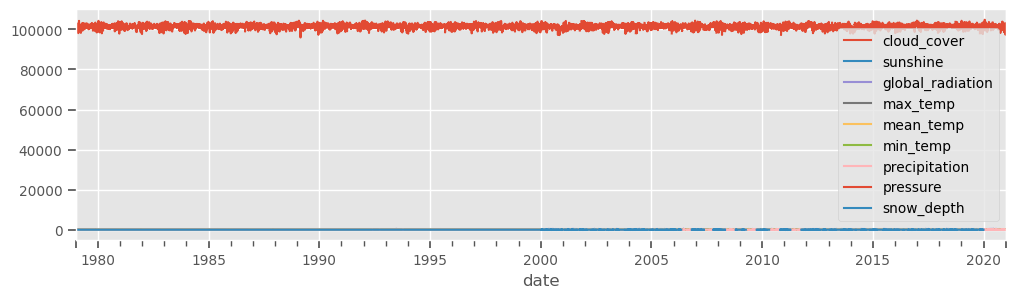

In [13]:
df_ts.plot();

In [14]:
df_ts.loc['2000':]

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
2000-01-01,7.00,0.40,18.00,10.80,7.00,4.90,0.00,"102,450.00",0.00
2000-01-02,7.00,0.70,20.00,11.50,7.90,5.00,0.20,"102,530.00",0.00
2000-01-03,8.00,0.00,13.00,9.50,9.40,7.20,6.00,"101,860.00",0.00
2000-01-04,5.00,2.90,34.00,11.00,7.00,4.40,0.20,"101,480.00",0.00
2000-01-05,5.00,1.30,25.00,10.80,6.40,1.90,0.80,"101,420.00",0.00
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
2020-12-28,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
2020-12-29,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN


In [15]:
df2 = df_ts.loc['2000':,['precipitation','mean_temp', 'min_temp', 'max_temp','snow_depth']]

<AxesSubplot: xlabel='date'>

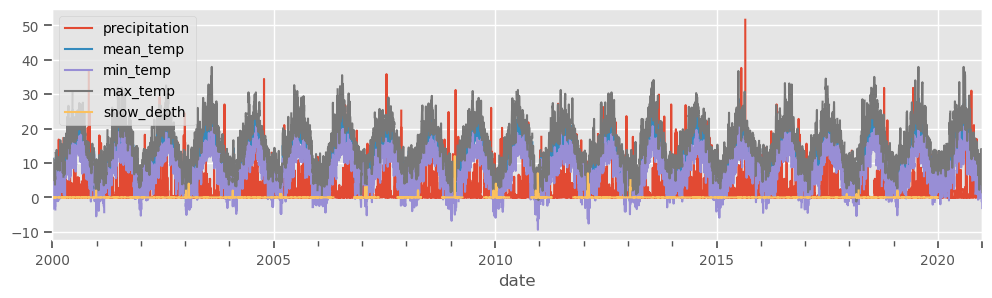

In [16]:
df2.plot()

In [17]:
df2['precipitation']=df2['precipitation'].fillna(0)

In [18]:
df2['snow_depth']=df2['snow_depth'].fillna(method='ffill')

In [19]:
df2[['mean_temp', 'min_temp', 'max_temp']]=df2[['mean_temp', 'min_temp', 'max_temp']].interpolate()

In [20]:
df2.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

In [21]:
df2.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq=None)

# Q1: What month had the most precipitation between 2000 through 2010?

In [22]:
month_ts = df2.resample('M').sum()

In [23]:
month_ts.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=252, freq='M')

In [24]:
month_ts.loc['2000':'2010',['precipitation']]

,precipitation
date,
2000-01-31,14.30
2000-02-29,62.20
2000-03-31,13.40
2000-04-30,71.80
2000-05-31,68.40
...,...
2010-08-31,83.80
2010-09-30,38.00
2010-10-31,61.00


In [25]:
month_ts.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

In [26]:
month_ts.shape

(252, 5)

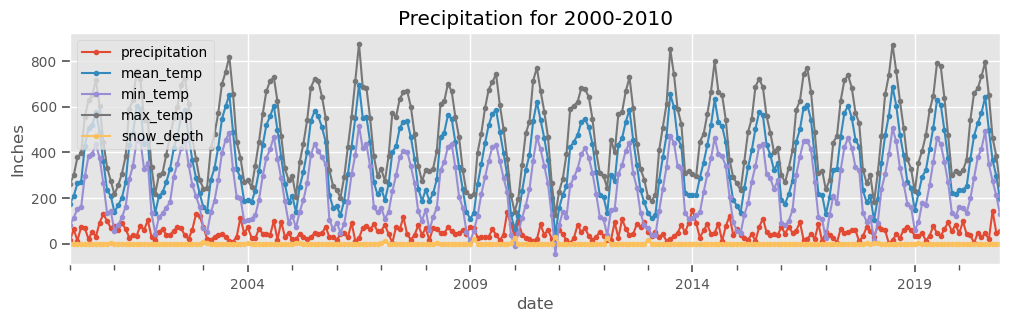

In [27]:
ax = month_ts.plot(style='.-')
ax.set(title="Precipitation for 2000-2010", ylabel="Inches");

# Q2: Which year between 2000-2020 had the coolest average temperature?

In [28]:
year_ts = df2.resample('A').sum()

In [29]:
year_ts.index

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', name='date', freq='A-DEC')

In [30]:
year_ts.loc['2000':'2010',['min_temp']]

,min_temp
date,
2000-12-31,"2,928.55"
2001-12-31,"2,791.30"
2002-12-31,"3,075.45"
2003-12-31,"2,882.00"
2004-12-31,"3,013.85"
2005-12-31,"2,910.35"
2006-12-31,"3,104.80"
2007-12-31,"2,963.85"
2008-12-31,"2,770.20"


In [31]:
year_ts.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

In [32]:
year_ts.shape

(21, 5)

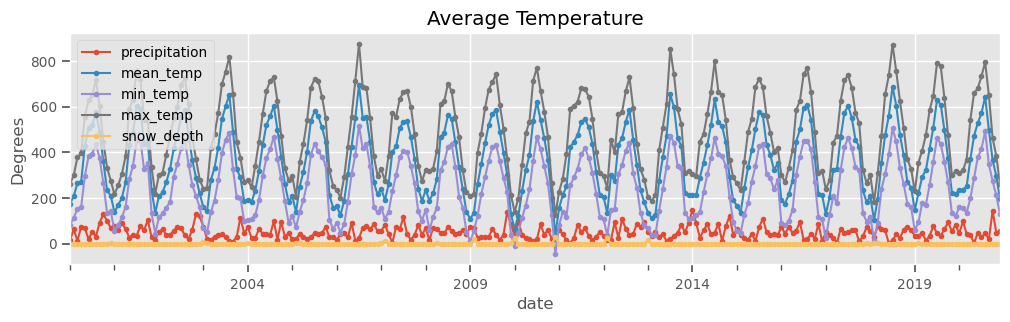

In [33]:
ax = month_ts.plot(style='.-')
ax.set(title="Average Temperature", ylabel="Degrees");